In [1]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf
from portfolio import *
import numpy  as np
import seaborn as sns

In [8]:
COLORS = ['red','blue','skyblue','orange', 'green',]
sns.set_style('darkgrid', {'legend.frameon':True})
INTERVAL = {'5 DIAS':'5d','1 SEMANA':'1wk','1 MÊS':'1mo','3 MÊSES':'3mo'}

In [9]:

def set_assets_portfolio(port, assets, start, end, interval):
    data = yf.download(assets, start=start, end=end, interval=interval)
    CLOSES = data['Adj Close']
    port.dates =  list(CLOSES.dropna().index)
    assets_name = list(CLOSES.columns)
    


    for asset in assets_name:
        data =  np.array(list(CLOSES[asset].array))
        data = data[np.logical_not(np.isnan(data))]
        if len(data)>0:
            port.add_asset(asset, data)
            port.assets_dates[asset] = list(CLOSES[asset].dropna().index)

    port.set_to_calculate_risk()
    port.calculate_return()

In [10]:
def minimize_portfolio(port):
    assets_name = list(port.port.keys())
    limites = tuple([(0, 1) for c in range(len(assets_name))])
    x0 = [1/len(assets_name) for c in range(len(assets_name))]

    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    result = minimize(port.sharpe_ratio_invert, x0, method='SLSQP', bounds=limites, constraints=cons)

    if result.success:
        fitted_params = result.x
        print('\n')
        for asset in range(len(assets_name)):
            print(f"Ação {assets_name[asset]} {round(fitted_params[asset]*100,2)}%")
        print('\n')
        print(f'Risco do portifólio: {round(port.risk_portfolio(fitted_params),3)}%')
        print(f'Retorno do portifólio: {round(port.return_portfolio(fitted_params),3)}%')
        print(f'Indici Sharpe do portifólio: {round(port.sharpe_ratio(fitted_params, risk_free_rate=0.006),3)}')
        print('\n')
    else:
        raise ValueError(result.message)

    return {asse:round(taxa*100,2) for asse, taxa  in zip(assets_name,fitted_params)}, fitted_params


In [11]:
start = "2009-01-01"
end = "2015-04-30"
interval="3 MÊSES"
assets = "SPY AAPL FB VALE MSFT VALE ITUB UNH BAC CCL DVN MU"
port = Portifolio()

assets_name = set_assets_portfolio(port, assets, start, end, INTERVAL[interval])


[*********************100%***********************]  11 of 11 completed


In [12]:
print(f'Usando o intervalo de {interval} para cálculo do Sharpe Ratio')
fitted_params, taxas_assets = minimize_portfolio(port)

Usando o intervalo de 3 MÊSES para cálculo do Sharpe Ratio


Ação AAPL 18.11%
Ação BAC 0.0%
Ação CCL 0.0%
Ação DVN 0.0%
Ação FB 22.6%
Ação ITUB 0.0%
Ação MSFT 17.89%
Ação MU 0.0%
Ação SPY 0.0%
Ação UNH 41.4%
Ação VALE 0.0%


Risco do portifólio: 0.064%
Retorno do portifólio: 5.356%
Indici Sharpe do portifólio: 83.998




In [13]:
lis = []
name_lis = []
for asset in fitted_params.keys():
    if fitted_params[asset]>0.01:
        lis.append(fitted_params[asset])
        name_lis.append(asset)

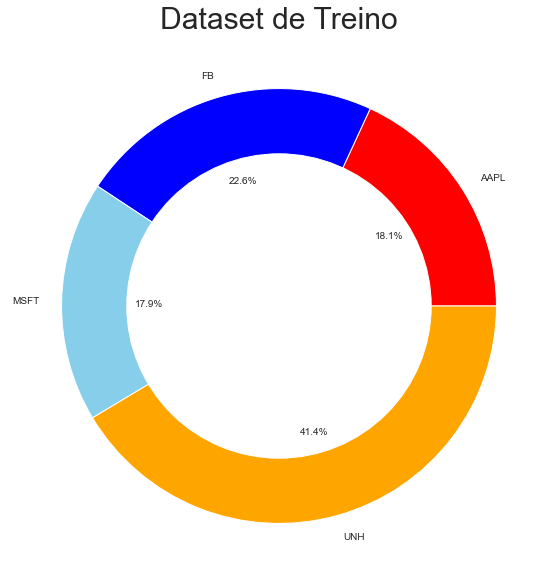

In [14]:
plt.figure(figsize=(20,10))
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(lis, labels=name_lis, colors=[COLORS[c] for c in range(len(lis))], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Dataset de Treino', fontsize=30)
plt.show()

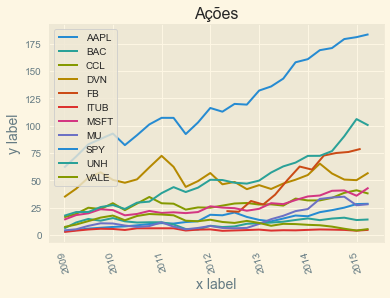

IndexError: list index out of range

In [21]:
port.chart_to_portfolio()
port.chart_to_portfolio_return_porcent(taxas_assets)

In [16]:
start = "2015-04-30"
end = "2021-10-30"
interval="1mo"
port_teste = Portifolio()

assets_name = set_assets_portfolio(port_teste, assets, start, end, interval)

[*********************100%***********************]  11 of 11 completed


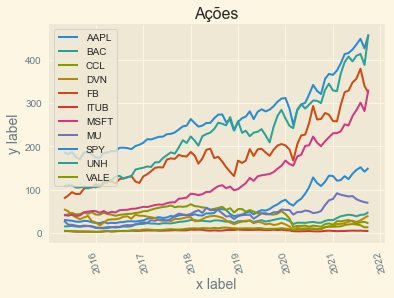

In [17]:
port_teste.chart_to_portfolio()

In [18]:
port_teste.return_portfolio(taxas_assets)

5.019346668232997

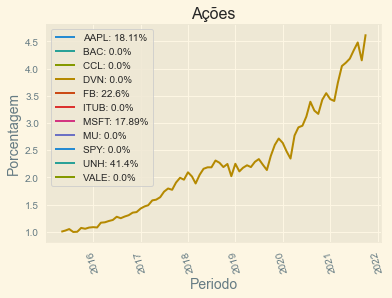

In [19]:
port_teste.chart_to_portfolio_return_porcent(taxas_assets)